In [1]:
import sys
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

sys.version_info

sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)

In [2]:
X, y = make_blobs()

len(X) == len(y)

True

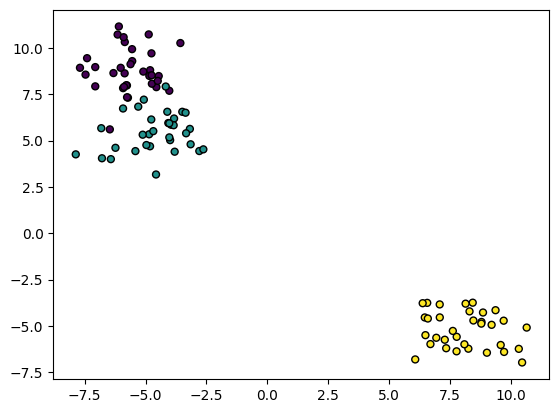

In [3]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

In [15]:
import random
import numpy as np
import math

from collections import defaultdict

class KMeans:
    def __init__(self, X, k: int = 3) -> None:
        self.k = k
        self.centroids = None
        self.X = X
        self.length = X.shape[0]
        self._centroids = None


    def get_centroids(self, k: int = 3):
        idxes = np.random.choice(
            self.length, 
            size=k, 
            replace=False
        )
        return self.X[idxes]
    
    def _compute_distance(self, a, b):
        return math.sqrt(
            (a[0] - b[0]) ** 2 +
            (a[1] - b[1]) ** 2
        )


    def fit_once(self, centroids):
        closest_centroids = [None] * self.length
        distances = [None] * self.length
        labels = [None] * self.length


        for idx, x in enumerate(self.X):
            chosen_centroid = None
            min_distance = float("inf")

            for candidate_idx, candidate_centroid in enumerate(centroids):
                candidate_distance = self._compute_distance(x, candidate_centroid)

                if candidate_distance < min_distance:
                    chosen_centroid = candidate_centroid
                    min_distance = candidate_distance
                    closest_centroids[idx] = chosen_centroid
                    labels[idx] = candidate_idx
            
            distances[idx] = min_distance
        
        mean_distance = sum(distances) / self.length
        return closest_centroids, labels, mean_distance

    def find_centroids(self, labels, k: int = 3):
        points = defaultdict(list)
        for idx, label in enumerate(labels):
            points[label].append(self.X[idx])
        
        centroids = []
        for idx, group in points.items():
            # print(group)
            np_group = np.array(group)
            # print(np_group)
            centroids.append(np_group.mean(axis=1))
        
        return centroids


    def fit(self, tol=0.0001, max_iter=100):
        best_distance = float("inf")
        labels = None

        for iter_num in range(max_iter):
            if iter_num == 0:
                init_centroids = self.get_centroids(k=self.k)
                self._centroids = init_centroids
                _, labels, best_distance = self.fit_once(init_centroids)
                
            else:
                centroids = self.find_centroids(labels, k=self.k)
                _, new_labels, new_mean_distance = self.fit_once(centroids)
                if new_mean_distance < best_distance:
                    if new_mean_distance - best_distance <= tol:
                        print("can't find better distance, stopping")
                        return labels

                    labels = new_labels
                    best_distance = new_mean_distance
                    self._centroids = centroids
        
            # print(best_distance)
        return labels
    
    def predict(self, points) -> list[int]:
        labels = []
        for point in points:
            best_distance = float("inf")
            best_label = None
            for idx, candidate_centroid in enumerate(self._centroids):
                candidate_distance = self._compute_distance(point, candidate_centroid)
                if candidate_distance < best_distance:
                    best_distance = candidate_distance
                    best_label = idx
            labels.append(best_label)
        
        return labels



In [16]:
# for _ in range(10):
k_means = KMeans(X=X, k=3)
labels = k_means.fit(max_iter=10)
# print("===")
# len(set(labels))

In [17]:
centroids = np.array(k_means._centroids)
centroids

array([[-7.85986129,  4.25367654],
       [-3.14903467,  4.79573351],
       [-3.95063557,  5.84981732]])

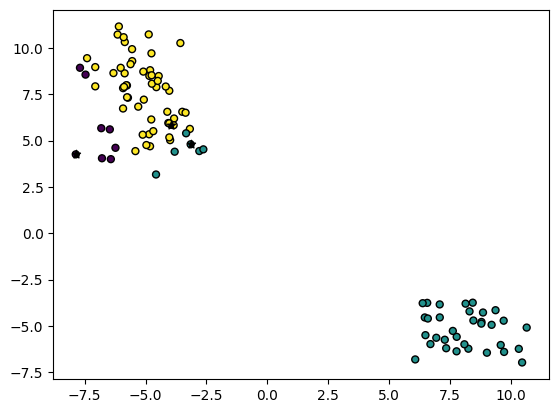

In [18]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=labels, s=25, edgecolor="k")
plt.scatter(centroids[:, 0], centroids[:, 1], marker="*", c="black")
plt.show()


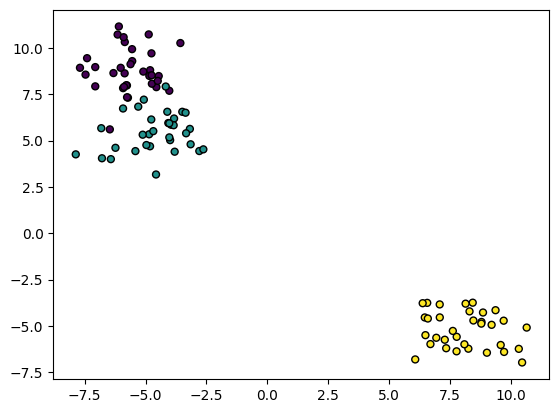

In [19]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
plt.show()


In [24]:
k_means.predict([(10, 10), (0, 0), (10, -7.5), (-7.5, 10), (-7.5, 10)])

[1, 1, 1, 2, 2]